In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\omth0419\Desktop\data fsds\Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Preprocessing

In [4]:
#adding the column for region
data['Region']=0
data['Region'][122:]=1

In [5]:
data.drop(index=[122,123,167], inplace=True)

In [6]:
data['year'].unique()

array(['2012'], dtype=object)

In [7]:
#reset index and columns
data.columns = data.columns.str.strip ()

In [8]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
data.shape

(243, 15)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       243 non-null    float64
dtypes: float64(15)
memory usage: 30.4 KB


In [11]:
data.describe()

,Region
count,243.000000
mean,0.497942
std,0.501028
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
#converting the Classes to integer
data['Classes']=data['Classes'].str.strip().map({'not fire':0,'fire':1})

In [13]:
#converting onject to int /float 
for i in data.columns: data[i]=data[i].astype(float)

## EDA

In [17]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

<AxesSubplot:>

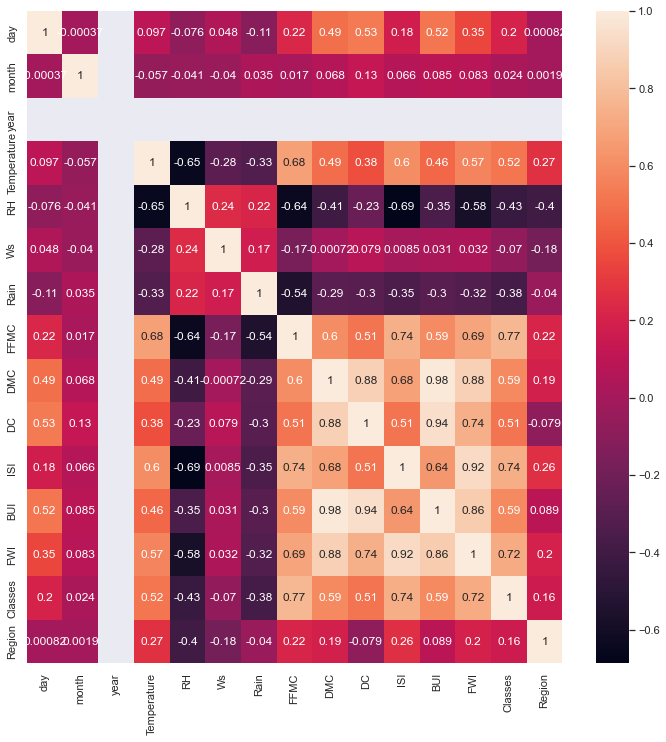

In [18]:
sns.set(rc={'figure.figsize':(12,12)})

sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='month', ylabel='count'>

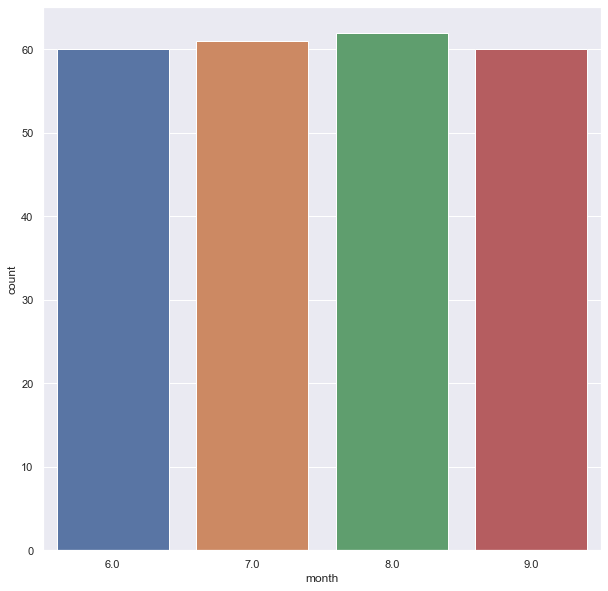

In [19]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x=data['month'])

In [20]:
#droping year & month as it has very poor corelation and is not going to help anyway in the prediction
data.drop(columns=['year'],inplace=True)
data.drop(columns=['month'],inplace=True)

In [21]:
data

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,1.0
242,27.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,1.0
243,28.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,1.0
244,29.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,1.0


<AxesSubplot:>

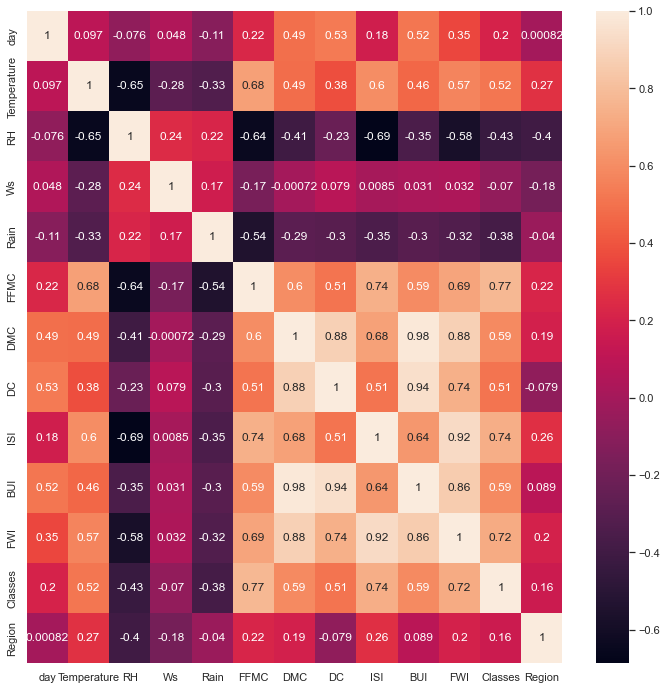

In [22]:
sns.set(rc={'figure.figsize':(12,12)})

sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='FWI', ylabel='ISI'>

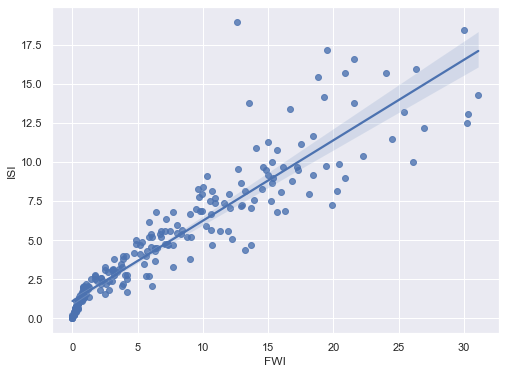

In [23]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="FWI",y="ISI",data=data)

<AxesSubplot:xlabel='BUI', ylabel='DMC'>

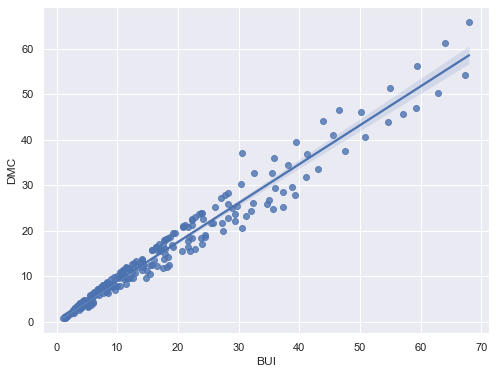

In [24]:
sns.regplot(x="BUI",y="DMC",data=data)

<AxesSubplot:xlabel='BUI', ylabel='DC'>

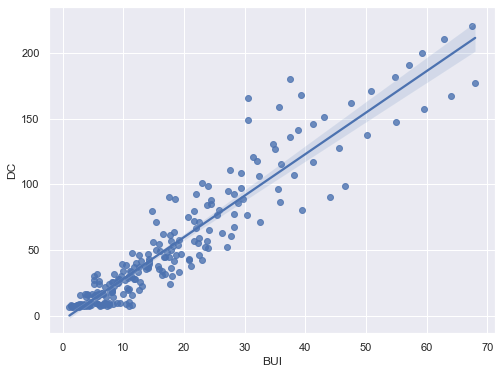

In [25]:
sns.regplot(x="BUI",y="DC",data=data)

<AxesSubplot:xlabel='Rain', ylabel='FWI'>

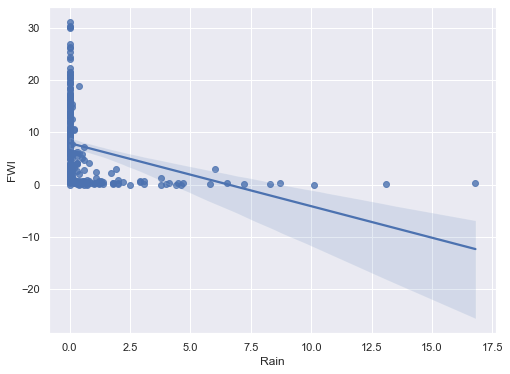

In [26]:
sns.regplot(x="Rain",y="FWI",data=data)

<AxesSubplot:xlabel='DC'>

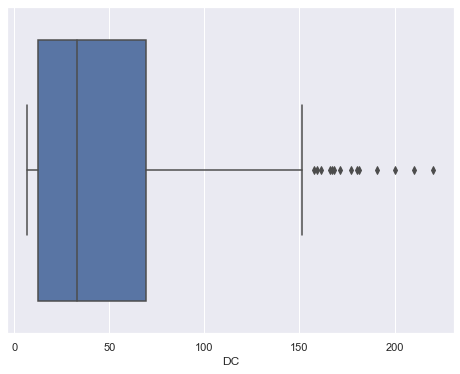

In [27]:
sns.boxplot(data['DC'])

<AxesSubplot:xlabel='DMC'>

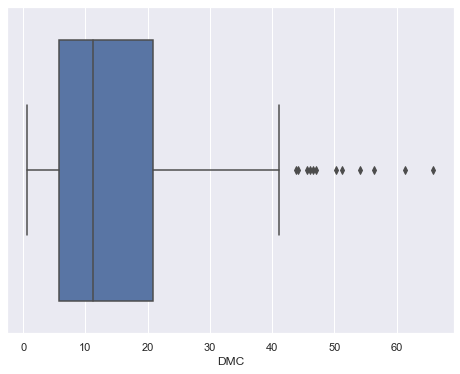

In [28]:
sns.boxplot(data['DMC'])

# Observations

Buildup Index(BUI) is higher when Duff Moisture Code (DMC) & Drought Code (DC) index are higher.

Fire Weather Index (FWI) and Initial Spread Index (ISI) also have a direct correlation

Rain and Chances of Fire are inversely proportional

# Regression

In [29]:
# Splitting Input and Output features
X=data.drop('Temperature',axis=1)
y=data['Temperature']

In [30]:
X.head()

,day,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [31]:
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
241    30.0
242    28.0
243    27.0
244    24.0
245    24.0
Name: Temperature, Length: 243, dtype: float64

## Test-Train split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=60, shuffle=True)

In [33]:
X_train.shape

(170, 12)

In [34]:
X_test.shape

(73, 12)

In [35]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

print("Linear Regression R^2 score: {:.5f}".format(regression.score(X_test,y_test)))

Linear Regression R^2 score: 0.51722


## Standardize or feature scaling the datasets

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
X_train

array([[-1.45505805, -2.11245449,  0.48966871, ...,  1.67948853,
         0.8991722 ,  1.02381286],
       [ 0.24617901, -1.82794883, -0.56851367, ...,  2.58520263,
         0.8991722 ,  1.02381286],
       [-0.66114742,  0.80372847, -0.21578621, ..., -0.87782187,
        -1.11213403,  1.02381286],
       ...,
       [-0.66114742, -0.54767339, -0.56851367, ...,  0.62726186,
         0.8991722 , -0.976741  ],
       [-1.22822644,  0.16359075, -0.92124114, ..., -0.10530102,
         0.8991722 , -0.976741  ],
       [ 0.92667383, -1.75682242, -0.21578621, ...,  2.66511858,
         0.8991722 ,  1.02381286]])

In [38]:
X_test

array([[-0.54773162, -1.47231676,  1.90057856, -0.37793339,  0.92609299,
         0.2528078 , -0.4010645 ,  2.15330596,  0.07220351,  1.30654743,
         0.8991722 ,  1.02381286],
       [ 0.35959481, -0.04978849,  1.19512364, -0.37793339,  0.8391319 ,
         0.63327279,  1.43065688,  1.24902672,  0.96089235,  1.37314406,
         0.8991722 , -0.976741  ],
       [ 1.26692125, -1.04555828, -0.92124114, -0.37793339,  0.90435272,
         0.55717979,  1.17940306,  1.00462692,  0.8339368 ,  1.12007688,
         0.8991722 , -0.976741  ],
       [ 0.13276321, -2.75259221, -2.33215098, -0.37793339,  1.3174179 ,
         1.17353308,  0.52897987,  2.71542549,  0.90075551,  2.27885816,
         0.8991722 ,  1.02381286],
       [ 0.92667383,  0.23471717,  0.48966871, -0.37793339,  0.58549538,
        -0.27984319,  0.11157434,  0.24698756, -0.13493449,  0.08116953,
         0.8991722 , -0.976741  ],
       [-0.20748421,  1.08823413,  1.5478511 , -0.15438197, -1.3638824 ,
        -0.78205698, -

## Model training

In [39]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
print(regression.coef_)

[-0.52907784 -1.20296165 -0.55401416  0.12979784  1.30935457  0.38145784
 -0.02540047 -0.09429475  0.37396684  0.00779178  0.11062357  0.02200029]


In [41]:
print(regression.intercept_)

32.09411764705882


In [42]:
## PRediction for the test data
reg_pred=regression.predict(X_test)
reg_pred

array([34.32838578, 32.88678148, 34.81345357, 38.95786485, 31.66304246,
       27.57359462, 32.28462351, 33.64286882, 35.42903655, 34.40267074,
       28.93337303, 25.60261584, 35.11374285, 33.79029726, 31.64804131,
       36.51772765, 26.1903595 , 33.45576672, 28.35400887, 31.10013209,
       33.54746812, 31.35225351, 27.86923593, 32.86761574, 30.52311697,
       31.97732151, 28.12387291, 32.64045014, 31.08150277, 34.14806798,
       35.69228161, 35.73511471, 35.38030938, 29.43545869, 34.83587571,
       36.75487803, 29.13294907, 33.22175439, 34.63048261, 28.76666044,
       31.58125556, 34.29506891, 32.0773295 , 25.69277599, 30.81519649,
       26.30150095, 33.54674253, 32.90102101, 35.07894584, 31.05804306,
       32.11554467, 30.72212236, 32.69488791, 33.71948305, 35.44606672,
       30.18374372, 34.46687963, 28.29005075, 32.89674516, 30.66046471,
       32.47708751, 33.40866045, 35.21392726, 33.98270626, 36.17898798,
       29.21559081, 37.06171496, 28.57896704, 35.99800763, 25.69

Text(0, 0.5, 'Test Predicted Data')

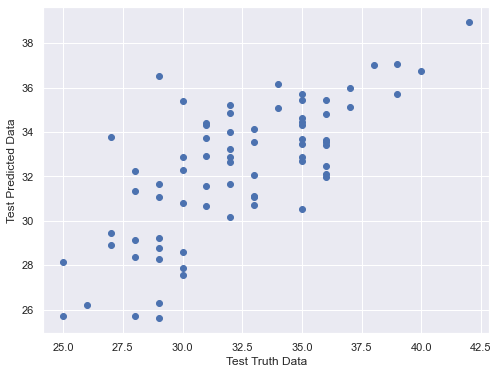

In [43]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

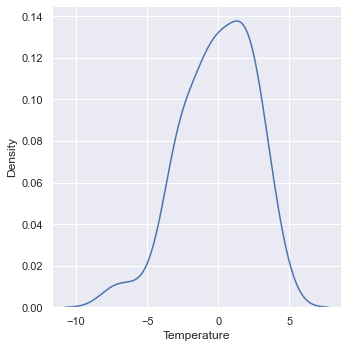

In [44]:
# Residuals
residuals=y_test-reg_pred
sns.displot(residuals,kind="kde")

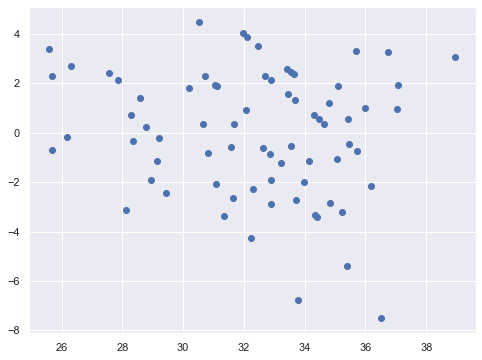

In [45]:
plt.scatter(reg_pred,residuals)

## Performance metrics for Regression

In [46]:
# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.408182085920553
2.0704221263612217
2.5314387383305474


In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5172165813347099


In [48]:
# Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4206598976016519

# Ridge

## Model training

In [49]:
# Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [50]:
ridge.fit(X_train,y_train)

Ridge()

In [51]:
# coefficients and intercept values
print("Ridge coefficients: ",end="")
print(ridge.coef_)
print("Ridge Intercept: ",end="")
print(ridge.intercept_)

Ridge coefficients: [-0.52274445 -1.19315959 -0.55668157  0.12320797  1.2868844   0.39223487
  0.003472   -0.07239569  0.32758287  0.00799154  0.11558243  0.02733839]
Ridge Intercept: 32.09411764705882


In [52]:
#Prediction of the output
ridge_pred=ridge.predict(X_test)
ridge_pred

array([34.33223267, 32.89945127, 34.81870056, 38.96681751, 31.67037465,
       27.58588376, 32.27395073, 33.65345739, 35.42181263, 34.39392897,
       28.93941463, 25.66625742, 35.09698004, 33.78418805, 31.63631711,
       36.49608814, 26.23277178, 33.44637937, 28.37841444, 31.08997429,
       33.55195695, 31.36517432, 27.8975869 , 32.85645584, 30.54039048,
       31.98008819, 28.13056725, 32.62612794, 31.06586448, 34.1452351 ,
       35.68021773, 35.71996349, 35.36988929, 29.44143287, 34.83014913,
       36.75310502, 29.15585683, 33.22550273, 34.62043555, 28.77907161,
       31.59129656, 34.28616091, 32.07133033, 25.74498693, 30.83129661,
       26.36197396, 33.54178726, 32.90002604, 35.0798176 , 31.05071227,
       32.11408525, 30.70852972, 32.68714517, 33.71503726, 35.44303833,
       30.18806539, 34.45234446, 28.32424898, 32.86521249, 30.65373302,
       32.48637619, 33.41245766, 35.20598355, 33.97871631, 36.18167448,
       29.21491436, 37.06697106, 28.59718956, 35.9979483 , 25.75

Text(0, 0.5, 'Test Predicted Data')

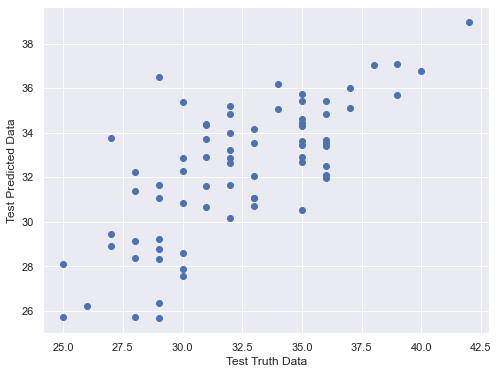

In [53]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

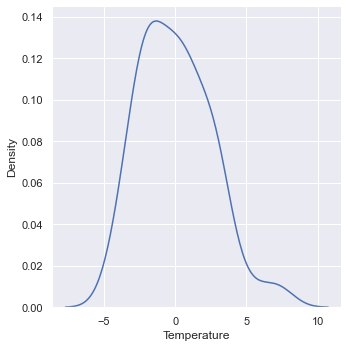

In [54]:
# Residuals
residuals=ridge_pred-y_test
sns.displot(residuals,kind='kde')

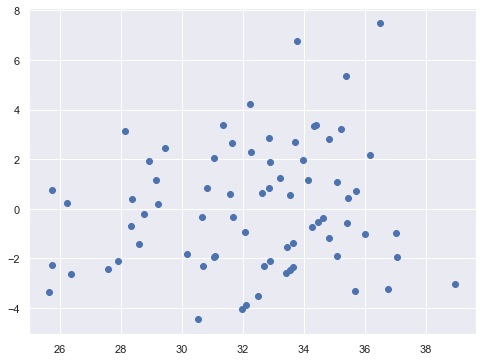

In [55]:
#scatter of predicted data and residuals
plt.scatter(ridge_pred,residuals)

In [56]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.378630389279696
2.0676273401976335
2.5255950564727705


In [57]:
# R-square
score=r2_score(y_test,ridge_pred)
score

0.5194429645648273

In [58]:
#Adjusted R-square
1-((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

0.42333155747779283

# Lasso

## Model training

In [59]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [60]:
lasso.fit(X_train,y_train)

Lasso()

In [61]:
# coefficients and intercept values
print("coefficients: ",end="")
print(lasso.coef_)
print("Intercept: ",end="")
print(lasso.intercept_)

coefficients: [-0.         -0.73039907 -0.         -0.          0.99227596  0.
  0.          0.          0.          0.          0.          0.        ]
Intercept: 32.09411764705882


In [62]:
# predict the output
lasso_pred=lasso.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

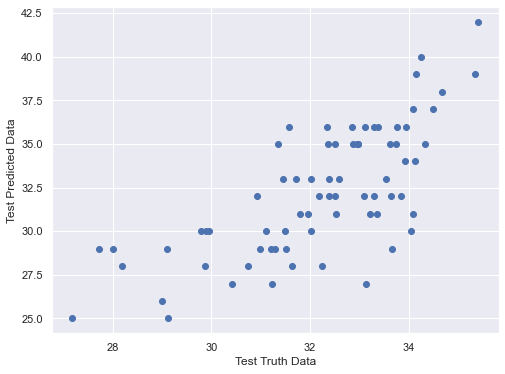

In [63]:
plt.scatter(lasso_pred,y_test)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [64]:
residuals=lasso_pred-y_test

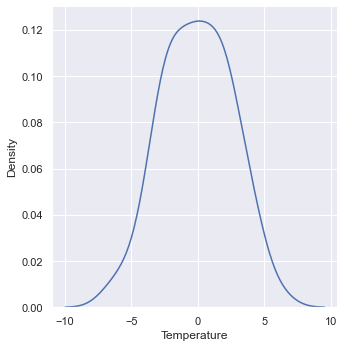

In [65]:
sns.displot(residuals,kind='kde')

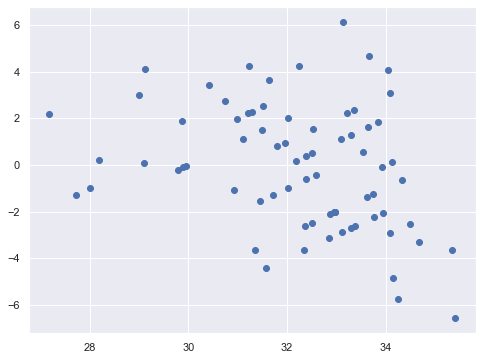

In [66]:
#scatter of predicted data and residuals
plt.scatter(lasso_pred,residuals)

## Performance metrics

In [67]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

6.992041118333244
2.178274216026099
2.644246796033465


In [68]:
#R-square
score=r2_score(y_test,reg_pred)
print(score)

0.5172165813347099


In [69]:
#Adjusted R-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4206598976016519

# Elastic Net

## Model training

In [70]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,y_train)

ElasticNet()

In [71]:
# coefficients and intercept values
print("coefficients: ",end="")
print(elastic.coef_)
print("Intercept: ",end="")
print(elastic.intercept_)

coefficients: [-0.         -0.69620591 -0.21278223 -0.          0.71228118  0.0995117
  0.          0.21934304  0.0197834   0.1402711   0.09548915  0.        ]
Intercept: 32.09411764705882


In [72]:
# predict the values from model
elas_pred=elastic.predict(X_test)

Text(0, 0.5, 'Truth values')

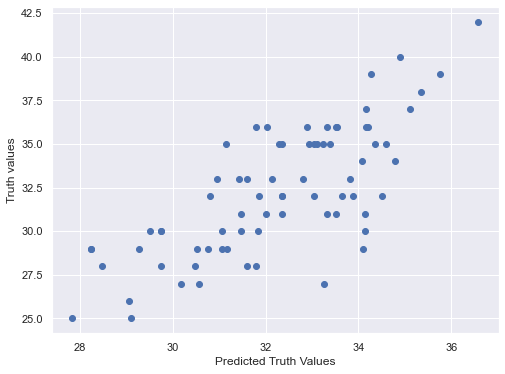

In [73]:
plt.scatter(elas_pred,y_test)
plt.xlabel('Predicted Truth Values')
plt.ylabel('Truth values')

In [74]:
residuals=elas_pred-y_test

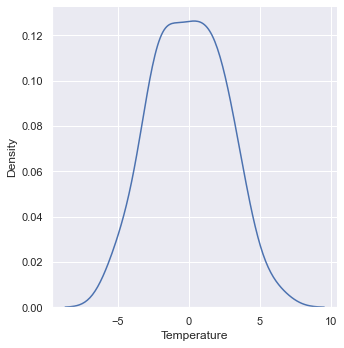

In [75]:
sns.displot(residuals,kind='kde')

Text(0, 0.5, 'residuals')

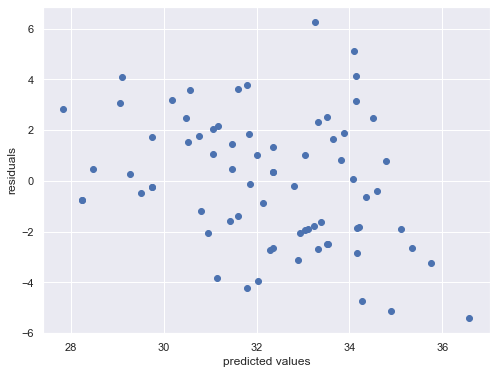

In [76]:
#scatter plot between predicted values and residuals
plt.scatter(elas_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('residuals')

In [77]:
#R-square
score=r2_score(y_test,lasso_pred)
score

0.4732294636299679

In [78]:
#Adjusted R-square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.36787535635596147